In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
!pip install konlpy

In [77]:
import pandas as pd

train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test2.csv")

In [78]:
%matplotlib inline
import matplotlib.pyplot as pyplot

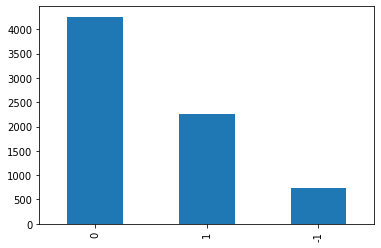

In [79]:
train_data['label'].value_counts().plot(kind='bar')

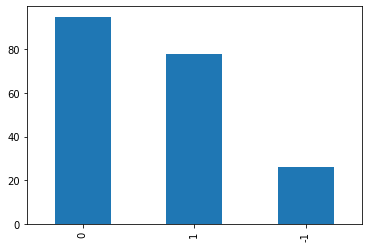

In [80]:
test_data['label'].value_counts().plot(kind='bar')

In [81]:
print(train_data.groupby('label').size().reset_index(name='count'))
print(test_data.groupby('label').size().reset_index(name='count'))

   label  count
0     -1    738
1      0   4258
2      1   2250
   label  count
0     -1     26
1      0     95
2      1     78


In [82]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] 

In [83]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = []
for sentence in train_data['title']:
  temp_X =[]
  temp_X = okt.morphs(str(sentence), stem=True) #토큰화
  temp_X = [word for word in temp_X if not word in stopwords] #안쓰는 말 제거
  X_train.append(temp_X)

X_test = []
for sentence in test_data['title']:
  temp_X =[]
  temp_X = okt.morphs(str(sentence), stem=True) #토큰화
  temp_X = [word for word in temp_X if not word in stopwords] #안쓰는 말 제거
  X_test.append(temp_X)

In [84]:
print(X_train[:3])

[['주가', '7%', '↑', '급상승', '이유'], ['여의도', '주식', '왕', '2', '부', '풍', '원', '정밀', 'vs', 'vs', '아모', '센스', '여의도', '달구다', '종목'], ['특징', '주', '곡물', '사료', '관련', '주', '영업', '익', '47%', '하락', '에도', '주가', '상승']]


In [85]:
print(X_test[:3])

[['31일', '정기', '주주총회'], ['실적', '점검', '4', 'Q', '영업', '이익', '101억원', 'PER', '9', '1', '배'], ['작년', '연간', '연결', '영업', '익', '313억', '전', '년비', '9', '4%', '↓']]


In [86]:
from re import X
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [87]:
print(X_train[:3])

[[2, 267, 5, 1811, 237], [559, 59, 807, 21, 646, 808, 93, 869, 353, 353, 5338, 5339, 559, 1407, 63], [8, 1, 1088, 690, 41, 1, 4, 27, 5340, 108, 335, 2, 14]]


In [88]:
print(X_test[:3])

[[541, 105, 129], [15, 79, 38, 65, 4, 32, 147, 352, 7, 72], [76, 178, 238, 4, 27, 7155, 13, 83, 352, 240, 180]]


In [89]:
print("제목의 최대 길이 : ", max(len(I) for I in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/len(X_train))

제목의 최대 길이 :  20
제목의 평균 길이 :  9.34032569693624


In [90]:
print("제목의 최대 길이 : ", max(len(I) for I in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/len(X_test))

제목의 최대 길이 :  21
제목의 평균 길이 :  8.72361809045226


In [91]:
import numpy as np

y_train = []
y_test = []

for i in range(len(train_data['label'])):
  if train_data['label'].iloc[i]==1:
    y_train.append([0,0,1])
  elif train_data['label'].iloc[i]==0:
     y_train.append([0,1,0]) 
  elif train_data['label'].iloc[i]== -1:
     y_train.append([1,0,0]) 


for i in range(len(test_data['label'])):
  if test_data['label'].iloc[i]==1:
    y_test.append([0,0,1])
  elif test_data['label'].iloc[i]==0:
     y_test.append([0,1,0]) 
  elif test_data['label'].iloc[i]== -1:
     y_test.append([1,0,0]) 

y_train = np.array(y_train)
y_test = np.array(y_test)

In [92]:
y_train

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [93]:
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [94]:
#모델 만들기, 모든 데이터의 길이를 20으로 통일

from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
max_len = 20

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [95]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
653/653 [==============================] - 59s 85ms/step - loss: 0.4125 - accuracy: 0.8499 - val_loss: 0.1566 - val_accuracy: 0.9600
Epoch 2/10
653/653 [==============================] - 43s 66ms/step - loss: 0.0386 - accuracy: 0.9905 - val_loss: 0.1443 - val_accuracy: 0.9628
Epoch 3/10
653/653 [==============================] - 44s 67ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1573 - val_accuracy: 0.9628
Epoch 4/10
653/653 [==============================] - 43s 65ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.1624 - val_accuracy: 0.9655
Epoch 5/10
653/653 [==============================] - 42s 64ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.1698 - val_accuracy: 0.9586
Epoch 6/10
653/653 [==============================] - 42s 65ms/step - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.1653 - val_accuracy: 0.9724
Epoch 7/10
653/653 [==============================] - 42s 65ms/step - loss: 0.0128 - accuracy: 0.9974 - val_loss: 0.1798 - val_accuracy:

In [96]:
print("\n 테스트 정확도 : {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))

7/7 [==============================] - 0s 11ms/step - loss: 3.5581 - accuracy: 0.6683

 테스트 정확도 : 66.83%


In [97]:
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(LSTM(128))
model2.add(Dense(3, activation = 'softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])
history = model2.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
653/653 [==============================] - 42s 59ms/step - loss: 0.5078 - accuracy: 0.8137 - val_loss: 0.2775 - val_accuracy: 0.9228
Epoch 2/10
653/653 [==============================] - 25s 38ms/step - loss: 0.1347 - accuracy: 0.9603 - val_loss: 0.1785 - val_accuracy: 0.9545
Epoch 3/10
653/653 [==============================] - 25s 38ms/step - loss: 0.0647 - accuracy: 0.9822 - val_loss: 0.2843 - val_accuracy: 0.9145
Epoch 4/10
653/653 [==============================] - 25s 38ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.1522 - val_accuracy: 0.9641
Epoch 5/10
653/653 [==============================] - 27s 41ms/step - loss: 0.0252 - accuracy: 0.9934 - val_loss: 0.2262 - val_accuracy: 0.9324
Epoch 6/10
653/653 [==============================] - 25s 39ms/step - loss: 0.0186 - accuracy: 0.9957 - val_loss: 0.2566 - val_accuracy: 0.9255
Epoch 7/10
653/653 [==============================] - 25s 39ms/step - loss: 0.0121 - accuracy: 0.9968 - val_loss: 0.2624 - val_accuracy:

In [98]:
print("\n 테스트 정확도 : {:.2f}%".format(model2.evaluate(X_test, y_test)[1]*100))

7/7 [==============================] - 0s 10ms/step - loss: 4.9468 - accuracy: 0.6734

 테스트 정확도 : 67.34%


In [99]:
predict = model.predict(X_test)

In [100]:
predict_labels = np.argmax(predict,axis=1)
original_labels = np.argmax(y_test, axis=1)

In [101]:
for i in range(30):
  print("기사제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ",predict_labels[i])

기사제목 :  31일 정기주주총회 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  실적점검 4Q 영업이익 101억원 PER 9 1배 /	 원래 라벨 :  2 /	예측한 라벨 :  1
기사제목 :  작년 연간 연결 영업익 313억 전년비 9 4%↓ /	 원래 라벨 :  1 /	예측한 라벨 :  0
기사제목 :  권육상 대표이사 모친상 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  특징주 거리두기 강화에 주가 9% 들썩 4일만에 반등 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  주가 17%↑ 나투라미디어에 34억 운영자금 대여 결정 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  택배 포장 관련주 대영포장 주가 상승세 거리두기 강화 조치 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  계열사 나투라미디어에 34억 운영자금 대여 결정 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  특징주 주가 상승세 영업이익도 증가 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  진천군 제일제당 아크홀딩스와 상생 협약 /	 원래 라벨 :  2 /	예측한 라벨 :  1
기사제목 :  건기식협회 건강기능식품 공정경쟁규약 심의위원 위촉식 개최 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  LG화학 이너보틀 CJ대한통운 자원순환플랫폼 구축 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  내일부터 슈퍼주총 시즌 SK 두산그룹 등 1546개 상장사 몰려 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  다음주 슈퍼주총 SK 두산그룹 등 1546개 상장사 몰려 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  진천군 케이푸드밸리 산단과 상호협력 상생발전 협약 체결 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  중노위 현대제철 하청 노동자들과 산업 안전 단체교섭 해야 /	 원래 라벨 :  0 /	예측